In [ ]:
!pip install pandas==1.1.5
!pip install --upgrade openpyxl

'''
numpy>=1.17
scikit-learn>=0.22
pandas>=1.1.5
sklearn>=1.0.2
'''

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'\nnumpy>=1.17\nscikit-learn>=0.22\npandas>=1.1.5\nsklearn>=1.0.2\n'

## Data input and Visualisation

In [ ]:
import pandas as pd
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mydata=pd.read_excel('/content/drive/MyDrive/2 AI in health care/Data/Medical Data(Categorically int) 4679.xlsx')

In [ ]:
dictionary = {'Sex': {0: 'M', 1: 'F'},
 'Hypertension': {0: 'Yes', 1: 'No', -1: -1},
 'Diabetes': {0: 'No', 1: 'Yes', -1: -1},
 'Dyslipidemia': {0: 'No', 1: 'Yes', -1: -1},
 'TobaccoUse': {0: 'No', 1: 'Yes', 2: 'Former', -1: -1},
 'PriorPCI': {0: 'Yes', 1: 'No', -1: -1},
 'PriorCABG': {0: 'No', 1: 'Yes', -1: -1},
 'HxHF': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Aspirin': {0: 'No', 1: 'Yes'},
 'PreProcMedAdmin-Beta Blocker': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Statin': {0: 'Yes', -1: -1, 1: 'No', 2: 'Contraindicated'},
 'AccessSite': {0: 'Femoral', 1: 'Radial', 2: 'Brachial', 3: 'Other'},
 'PreProcTnTND': {0: 'Yes', 1: 'No'},
 'Dominance': {0: 'Right', 1: 'Co-dominant', 2: 'Left', -1: -1},
 'PCIStatus': {0: 'Elective', 1: 'Emergency', 2: 'Urgent', -1: -1},
 'PCIIndication': {0: 'PCI for high risk Non-STEMI or unstable angina',
  1: 'PCI for STEMI (Stable, >12 hrs from Sx onset)',
  2: 'PCI for STEMI (Stable after successful full-dose Thrombolysis)',
  3: 'PCI for STEMI (Unstable, >12 hrs from Sx onset)',
  4: 'Immediate PCI for STEMI',
  5: 'Staged PCI',
  6: 'Other',
  7: 'Rescue PCI for STEMI (after failed full-dose lytics)',
  8: 'NSTE - ACS',
  9: 'STEMI - Unstable (> 12 hrs from Sx)',
  10: 'Stable angina',
  11: 'STEMI - Stable (> 12 hrs from Sx)',
  12: 'STEMI (after successful lytics)',
  13: 'New Onset Angina <= 2 months',
  14: 'STEMI - Immediate PCI for Acute STEMI',
  15: 'Other PCI Indication',
  16: 'STEMI - Stable (<= 12 hrs from Sx)',
  17: 'CAD (without ischemic Sx)',
  18: 'STEMI - Rescue (After unsuccessful lytics)'}}

ObjCol = ['Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse', 'PriorPCI', 'PriorCABG', 'HxHF', 
          'PreProcMedAdmin-Aspirin', 'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite', 
          'PreProcTnTND', 'Dominance', 'PCIStatus', 'PCIIndication']

In [ ]:
Alive = mydata.loc[mydata['Discharge_Status'] == 0]
Deceased = mydata.loc[mydata['Discharge_Status'] == 1]

random_state = 42

Alive = Alive.sample(frac=1, random_state=random_state)
Deceased = Deceased.sample(frac=1, random_state=random_state)

In [ ]:
print(Alive.shape)
print(Deceased.shape)

(4625, 32)
(54, 32)


In [ ]:
train = pd.concat([Alive.iloc[:3700,:], Deceased.iloc[:34,:]])
test = pd.concat([Alive.iloc[3700:,:], Deceased.iloc[34:,:]])

train = train.sample(frac=1, random_state=random_state)
test = test.sample(frac=1, random_state=random_state)

In [ ]:
# Alive.shape
Alive.iloc[:3700,:].shape

(3700, 32)

In [ ]:
X_train=train.drop('Discharge_Status', axis=1)
Y_train=train['Discharge_Status']

X_test=test.drop('Discharge_Status', axis=1)
Y_test=test['Discharge_Status']

In [ ]:
print(X_train.shape)
print(X_test.shape)


(3734, 31)
(945, 31)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from lightgbm import LGBMClassifier

# from sklearn.naive_bayes import N
from seaborn import heatmap

## Feature Selection

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=mydata.drop('Discharge_Status', axis=1)
Y=mydata['Discharge_Status']

In [ ]:
model = RandomForestClassifier()

sc = StandardScaler()
scaled_X = sc.fit_transform(X)

model.fit(scaled_X,Y)
print(sum(model.feature_importances_),'\n',model.feature_importances_)
featureImportance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(['Importance'],ascending=False)
featureImportance 


1.0000000000000002 
 [0.05148078 0.00664574 0.01139656 0.01078569 0.00026346 0.00544685
 0.00215342 0.01179555 0.0088773  0.00925827 0.01524696 0.02831308
 0.00399156 0.00343929 0.0052345  0.07786032 0.01012479 0.05833633
 0.06969256 0.01561813 0.04594071 0.07327773 0.05016005 0.05434638
 0.04459678 0.00931464 0.12922603 0.09894751 0.01208623 0.02802206
 0.04812077]


,Importance
PostProcCreat,0.129226
PostProcHgb,0.098948
PreProcLVEF,0.077860
PreProcCreat,0.073278
PreProcMedAdmin-Statin,0.069693
PreProcMedAdmin-Beta Blocker,0.058336
LipidsTC,0.054346
Age,0.051481
HGB,0.050160
PCIIndication,0.048121


In [ ]:
scaledDataframe = pd.DataFrame(scaled_X)
scaledDataframe.columns = X.columns
scaledDataframe.describe()
featureImportance.to_excel('/content/drive/MyDrive/2 AI in health care/featureImportance.xlsx', index=True)

In [ ]:
featureImportanceArr = list(featureImportance.index)
print(featureImportanceArr)

['PostProcCreat', 'PostProcHgb', 'PreProcLVEF', 'PreProcCreat', 'PreProcMedAdmin-Statin', 'PreProcMedAdmin-Beta Blocker', 'LipidsTC', 'Age', 'HGB', 'PCIIndication', 'FluoroTime', 'LipidsHDL', 'Stent', 'PCIStatus', 'AccessSite', 'Vessel', 'Dominance', 'RCA', 'Hypertension', 'Diabetes', 'PreProcMedAdmin-Aspirin', 'PreProcTnTND', 'CIRC', 'LAD', 'Sex', 'TobaccoUse', 'HxHF', 'PriorPCI', 'PriorCABG', 'LMCA', 'Dyslipidemia']


In [ ]:
print(", ".join(featureImportanceArr[:15]))

PostProcCreat, PostProcHgb, PreProcLVEF, PreProcCreat, PreProcMedAdmin-Statin, PreProcMedAdmin-Beta Blocker, LipidsTC, Age, HGB, PCIIndication, FluoroTime, LipidsHDL, Stent, PCIStatus, AccessSite


In [ ]:
impFeat = 15 # 0 to 14

## Loop for finding Hyper Parameters of SVM

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=0
for kernel in ['linear','rbf']:
  for C in [0.01,0.02,0.05,0.1,0.2,0.5,0.8,1.0,2.0,5.0,10.0]:

    rfc = svm.SVC(gamma='scale',class_weight='balanced', random_state=42, kernel=kernel, C=C)
    rfc.fit(scaled_X_train,Y_train)
    cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
    cross_validation_scores.append(cross_validation.mean())
    i+=1
    print(i)
    predictions = rfc.predict(scaled_X_train)

    train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
    test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

    test_score.append(rfc.score(scaled_X_test, Y_test))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
print(cross_validation_scores)
print(train_confus_matrix)
print(test_confus_matrix)
print(test_score)

[0.8677017273741974, 0.8682389970965183, 0.8752023285276943, 0.8741303013663233, 0.8760041057886596, 0.8789499373723672, 0.8802893432532632, 0.880020887840908, 0.881092556104669, 0.8813602937218041, 0.881092556104669, 0.8122714270845671, 0.8730629398738833, 0.958493491391841, 0.9758993076865101, 0.9847357257448023, 0.9890206043117958, 0.9890202454141857, 0.9892879830313209, 0.9895560795460663, 0.9898238171632014, 0.9898238171632014]
[array([[3199,  501],
       [   3,   31]]), array([[3220,  480],
       [   3,   31]]), array([[3225,  475],
       [   1,   33]]), array([[3217,  483],
       [   1,   33]]), array([[3206,  494],
       [   1,   33]]), array([[3203,  497],
       [   1,   33]]), array([[3204,  496],
       [   1,   33]]), array([[3206,  494],
       [   1,   33]]), array([[3212,  488],
       [   1,   33]]), array([[3214,  486],
       [   1,   33]]), array([[3211,  489],
       [   1,   33]]), array([[3025,  675],
       [   4,   30]]), array([[3238,  462],
       [   3,

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
parameters = []
for kernel in ['linear','rbf']:
  for C in [0.01,0.02,0.05,0.1,0.2,0.5,0.8,1.0,2.0,5.0,10.0]:
    dictonary = {'kernel': kernel, 'C': C} 
    parameters.append(dictonary)


In [ ]:
len(trD_percentage)

22

In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage}).sort_values(['Test Deceased Accuracy'],ascending=False)
# deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,"{'kernel': 'linear', 'C': 0.01}",86.459459,91.176471,88.540541,90.0
1,"{'kernel': 'linear', 'C': 0.02}",87.027027,91.176471,88.108108,90.0
11,"{'kernel': 'rbf', 'C': 0.01}",81.756757,88.235294,82.918919,90.0
2,"{'kernel': 'linear', 'C': 0.05}",87.162162,97.058824,88.648649,90.0
3,"{'kernel': 'linear', 'C': 0.1}",86.945946,97.058824,88.540541,85.0
4,"{'kernel': 'linear', 'C': 0.2}",86.648649,97.058824,88.648649,85.0
12,"{'kernel': 'rbf', 'C': 0.02}",87.513514,91.176471,87.567568,85.0
7,"{'kernel': 'linear', 'C': 1.0}",86.648649,97.058824,88.324324,80.0
8,"{'kernel': 'linear', 'C': 2.0}",86.810811,97.058824,88.432432,80.0
9,"{'kernel': 'linear', 'C': 5.0}",86.864865,97.058824,88.324324,80.0


## Loop for finding accuracy as features are increased for SVM

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
for i in range(1, 32):

  impColumn = featureImportanceArr[:i]

  X_trainSliced = X_train[impColumn]
  X_testSliced = X_test[impColumn]

  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_trainSliced)
  scaled_X_test = sc.transform(X_testSliced) # For scaling Test data
  print(i)
  svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale')
  svc.fit(scaled_X_train,Y_train)
  cross_validation = cross_val_score(svc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
  cross_validation_scores.append(cross_validation.mean())

  predictions = svc.predict(scaled_X_train)

  train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
  test_confus_matrix.append(confusion_matrix(Y_test.values,svc.predict(scaled_X_test)))

  test_score.append(svc.score(scaled_X_test, Y_test))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
deceasedPercentage = pd.DataFrame({"Top i Features choosen":np.arange(1,32), "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage})
deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
deceasedPercentage

,Top i Features choosen,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,1,90.324324,64.705882,91.567568,95.0
1,2,88.729730,61.764706,90.486486,90.0
2,3,85.972973,70.588235,88.216216,95.0
3,4,90.135135,70.588235,92.108108,90.0
4,5,91.216216,70.588235,93.081081,85.0
5,6,88.864865,76.470588,90.162162,95.0
6,7,88.756757,73.529412,90.162162,95.0
7,8,88.945946,79.411765,90.594595,90.0
8,9,89.243243,79.411765,90.162162,90.0
9,10,88.972973,76.470588,89.405405,90.0


In [ ]:
# So either we could take the initial features or, the middle features

## SVM 

[0.81659973 0.78982597 0.81392236 0.78580991 0.80563003]
0.8023575984007522
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      3700
           1       0.04      0.88      0.08        34

    accuracy                           0.82      3734
   macro avg       0.52      0.85      0.49      3734
weighted avg       0.99      0.82      0.89      3734

[[3025  675]
 [   4   30]]


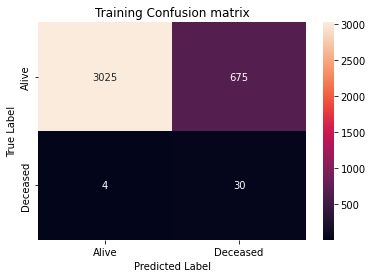

Training Accuracy = 0.8181574718800214
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       925
           1       0.10      0.90      0.18        20

    accuracy                           0.83       945
   macro avg       0.55      0.86      0.54       945
weighted avg       0.98      0.83      0.89       945

[[767 158]
 [  2  18]]


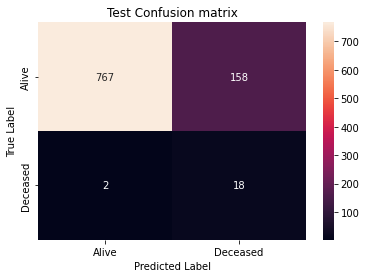

Testing Accuracy = 0.8306878306878307


In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale', random_state=42)
svc.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(svc,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = svc.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(svc.score(scaled_X_train, Y_train)))

predictions = svc.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(svc.score(scaled_X_test, Y_test)))

[0.70540975 0.79807177]
0.7517407605784681
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3700
           1       0.05      0.88      0.09        34

    accuracy                           0.84      3734
   macro avg       0.52      0.86      0.50      3734
weighted avg       0.99      0.84      0.90      3734

[[3096  604]
 [   4   30]]


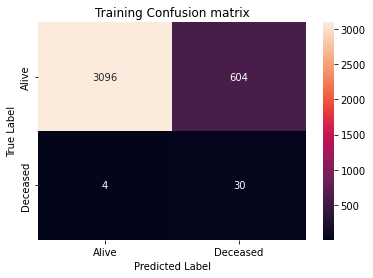

Training Accuracy = 0.8371719335832887
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       925
           1       0.12      0.90      0.21        20

    accuracy                           0.85       945
   macro avg       0.56      0.88      0.56       945
weighted avg       0.98      0.85      0.90       945

[[789 136]
 [  2  18]]


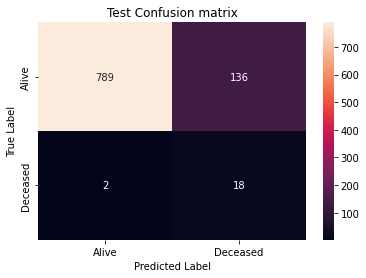

Testing Accuracy = 0.8539682539682539


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale', random_state=42)
svc.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(svc,X_train,Y_train,scoring="accuracy",cv=2)
print(cross_validation)
print(cross_validation.mean())

predictions = svc.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(svc.score(scaled_X_train, Y_train)))

predictions = svc.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(svc.score(scaled_X_test, Y_test)))

In [ ]:
# predictions = predictions.tolist()
# labels = Y_test.to_list()
# labelsIndex = Y_test.index.values.tolist()

# # Indexes where True Label Alive and Predicted Label is Deceased
# # They were discharged 'Alive' but our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==0 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/SVM_TAPD.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Alive
# # They were discharged 'Deceased' but our model has predicted them 'Alive'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==0):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/SVM_TDPA.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Deceased
# # They were discharged 'Deceased' and our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/SVM_TDPD.xlsx', index=False)

## Loop for finding Hyper Parameters of Random Forest

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=0
for n_estimators in [100, 200]:
  for min_samples_split in [2, 5, 10]:
    for min_samples_leaf in [1, 2, 4]:
      for max_depth in [1,2]:

        rfc = RandomForestClassifier(class_weight='balanced', max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                    min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=42)
        rfc.fit(scaled_X_train,Y_train)
        cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
        cross_validation_scores.append(cross_validation.mean())
        i+=1
        print(i)
        predictions = rfc.predict(scaled_X_train)

        train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
        test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

        test_score.append(rfc.score(scaled_X_test, Y_test))

In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
parameters = []
for n_estimators in [100, 200]:
  for min_samples_split in [2, 5, 10]:
    for min_samples_leaf in [1, 2, 4]:
      for max_depth in [1,2]:
        dictonary = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 
                            'max_depth': max_depth} 
        parameters.append(dictonary)


In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage}).sort_values(['Test Deceased Accuracy'],ascending=False)
# deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 1}",93.135135,76.470588,94.810811,85.0
1,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2}",94.324324,82.352941,95.243243,85.0
20,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0
21,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 2}",94.675676,82.352941,95.567568,85.0
22,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 1}",93.081081,76.470588,94.702703,85.0
23,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 2}",94.540541,82.352941,95.459459,85.0
24,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0
25,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 2}",94.702703,82.352941,95.567568,85.0
26,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0
27,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 2}",94.675676,82.352941,95.567568,85.0


## Loop for finding accuracy as features are increased for Random Forest

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
for i in range(1, 32):

  impColumn = featureImportanceArr[:i]

  X_trainSliced = X_train[impColumn]
  X_testSliced = X_test[impColumn]

  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_trainSliced)
  scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

  rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)
  rfc.fit(scaled_X_train,Y_train)
  cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
  cross_validation_scores.append(cross_validation.mean())
  i+=1
  print(i, end=', ')
  predictions = rfc.predict(scaled_X_train)

  train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
  test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

  test_score.append(rfc.score(scaled_X_test, Y_test))

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 

In [ ]:
print(cross_validation_scores)
print(train_confus_matrix)
print(test_confus_matrix)
print(test_score)

[0.9151070771019736, 0.8982360182463545, 0.8931490035207856, 0.8891329392637572, 0.8851190283923899, 0.893684837652666, 0.8990417433810307, 0.8931511569064462, 0.8995750652296406, 0.8891336570589777, 0.9006463745957916, 0.9054681639874961, 0.905201144165581, 0.9062724535317319, 0.9156454235171247, 0.9086871166524901, 0.9110928073329958, 0.9081469757492885, 0.914307453226669, 0.9062760425078329, 0.9191249358470521, 0.9188561215370867, 0.9110942429234363, 0.9156482946980056, 0.923944212955486, 0.9006513991623329, 0.9148386216896182, 0.918323158586087, 0.9220729208164202, 0.9220722030212001, 0.9303713513571713]
[array([[3414,  286],
       [  18,   16]]), array([[3324,  376],
       [  13,   21]]), array([[3331,  369],
       [  11,   23]]), array([[3369,  331],
       [  12,   22]]), array([[3304,  396],
       [  10,   24]]), array([[3315,  385],
       [   9,   25]]), array([[3325,  375],
       [   9,   25]]), array([[3290,  410],
       [   9,   25]]), array([[3316,  384],
       [  

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
deceasedPercentage = pd.DataFrame({"Top i Features choosen":np.arange(1,32), "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage})
deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
deceasedPercentage

,Top i Features choosen,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,1,92.270270,47.058824,93.513514,40.0
1,2,89.837838,61.764706,91.135135,65.0
2,3,90.027027,67.647059,91.783784,80.0
3,4,91.054054,64.705882,92.756757,70.0
4,5,89.297297,70.588235,91.351351,75.0
5,6,89.594595,73.529412,92.756757,95.0
6,7,89.864865,73.529412,93.513514,95.0
7,8,88.918919,73.529412,92.648649,95.0
8,9,89.621622,73.529412,93.513514,95.0
9,10,89.567568,70.588235,93.081081,100.0


In [ ]:
# So we can take from 7 to 18 features

## Random Forest


[0.91566265 0.93574297 0.92771084 0.91834003 0.94235925]
0.9279631483933948
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3700
           1       0.09      0.76      0.17        34

    accuracy                           0.93      3734
   macro avg       0.55      0.85      0.56      3734
weighted avg       0.99      0.93      0.96      3734

[[3446  254]
 [   8   26]]


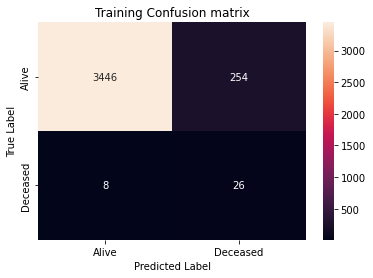

Training Accuracy =  0.9298339582217461
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       925
           1       0.26      0.85      0.40        20

    accuracy                           0.94       945
   macro avg       0.63      0.90      0.68       945
weighted avg       0.98      0.94      0.96       945

[[876  49]
 [  3  17]]


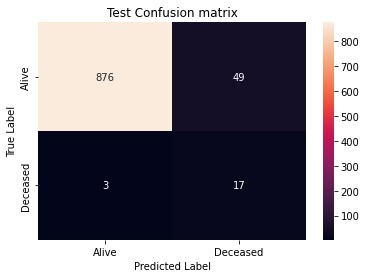

Testing Accuracy =  0.944973544973545


In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)
rfc.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(rfc,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = rfc.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = ', rfc.score(scaled_X_train, Y_train))

predictions = rfc.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = ', rfc.score(scaled_X_test, Y_test))

[0.91566265 0.93574297 0.92771084 0.91834003 0.94235925]
0.9279631483933948
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3700
           1       0.08      0.74      0.14        34

    accuracy                           0.92      3734
   macro avg       0.54      0.83      0.55      3734
weighted avg       0.99      0.92      0.95      3734

[[3411  289]
 [   9   25]]


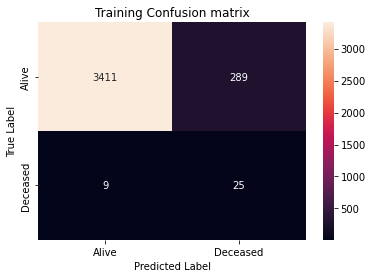

Training Accuracy =  0.9201928227102303
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       925
           1       0.29      0.95      0.44        20

    accuracy                           0.95       945
   macro avg       0.64      0.95      0.71       945
weighted avg       0.98      0.95      0.96       945

[[878  47]
 [  1  19]]


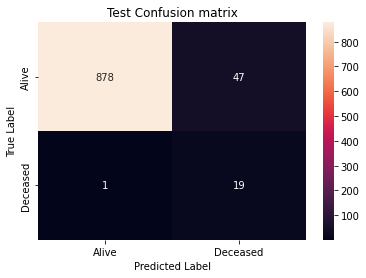

Testing Accuracy =  0.9492063492063492


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)
rfc.fit(scaled_X_train,Y_train)
# cross_validation = cross_val_score(rfc,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = rfc.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = ', rfc.score(scaled_X_train, Y_train))

predictions = rfc.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = ', rfc.score(scaled_X_test, Y_test))

In [ ]:
# predictions = predictions.tolist()
# labels = Y_test.to_list()
# labelsIndex = Y_test.index.values.tolist()

# # Indexes where True Label Alive and Predicted Label is Deceased
# # They were discharged 'Alive' but our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==0 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/RF_TAPD.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Alive
# # They were discharged 'Deceased' but our model has predicted them 'Alive'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==0):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/RF_TDPA.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Deceased
# # They were discharged 'Deceased' and our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/RF_TDPD.xlsx', index=False)

## Hyper parameter searching for Logistic Regression

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score
parameters = []

In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=0
for penalty in ['l1', 'l2']:
  for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    for C in [0.01,0.05,0.1,0.2,0.5,0.8,1.0,2.0,5.0,10.0]:
      try:

        rfc = LogisticRegression(C=C, penalty=penalty, solver=solver ,class_weight='balanced', random_state=42)
        rfc.fit(scaled_X_train,Y_train)
        cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
        cross_validation_scores.append(cross_validation.mean())
        i+=1
        print(i, end=',')
        predictions = rfc.predict(scaled_X_train)

        train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
        test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

        test_score.append(rfc.score(scaled_X_test, Y_test))
        dictonary = {'penalty': penalty, 'C': C, 'solver': solver} 
        parameters.append(dictonary)
      except:
        continue

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,

In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage}).sort_values(['Test Deceased Accuracy'],ascending=False)
# deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,"{'penalty': 'l1', 'C': 0.01, 'solver': 'liblinear'}",85.243243,85.294118,87.783784,95.0
13,"{'penalty': 'l2', 'C': 0.2, 'solver': 'newton-cg'}",88.810811,91.176471,90.054054,90.0
35,"{'penalty': 'l2', 'C': 0.8, 'solver': 'liblinear'}",88.783784,91.176471,89.945946,90.0
34,"{'penalty': 'l2', 'C': 0.5, 'solver': 'liblinear'}",88.675676,91.176471,89.837838,90.0
33,"{'penalty': 'l2', 'C': 0.2, 'solver': 'liblinear'}",88.459459,91.176471,89.945946,90.0
32,"{'penalty': 'l2', 'C': 0.1, 'solver': 'liblinear'}",88.243243,88.235294,90.162162,90.0
31,"{'penalty': 'l2', 'C': 0.05, 'solver': 'liblinear'}",87.756757,88.235294,89.729730,90.0
30,"{'penalty': 'l2', 'C': 0.01, 'solver': 'liblinear'}",85.000000,88.235294,87.783784,90.0
23,"{'penalty': 'l2', 'C': 0.2, 'solver': 'lbfgs'}",88.810811,91.176471,90.054054,90.0
22,"{'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs'}",88.864865,88.235294,90.594595,90.0


## Loop for finding accuracy as features are increased for Logistic Regression

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
for i in range(1, 32):

  impColumn = featureImportanceArr[:i]

  X_trainSliced = X_train[impColumn]
  X_testSliced = X_test[impColumn]

  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_trainSliced)
  scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

  lr = LogisticRegression(class_weight='balanced', random_state=42)#penalty= 'l2', C = 1, solver = 'liblinear', class_weight='balanced', random_state=42)
  lr.fit(scaled_X_train,Y_train)
  cross_validation = cross_val_score(lr,scaled_X_train,Y_train,scoring="accuracy",cv=5)
  cross_validation_scores.append(cross_validation.mean())
  i+=1
  print(i)
  predictions = lr.predict(scaled_X_train)

  train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
  test_confus_matrix.append(confusion_matrix(Y_test.values,lr.predict(scaled_X_test)))

  test_score.append(lr.score(scaled_X_test, Y_test))

In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
deceasedPercentage = pd.DataFrame({"Top i Features choosen":np.arange(1,32), "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage})
deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
deceasedPercentage

,Top i Features choosen,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,1,83.027027,50.000000,84.648649,45.0
1,2,80.216216,58.823529,82.702703,65.0
2,3,83.864865,70.588235,85.945946,95.0
3,4,85.324324,79.411765,86.810811,90.0
4,5,85.351351,76.470588,86.918919,90.0
5,6,85.000000,76.470588,88.648649,95.0
6,7,85.756757,82.352941,88.432432,95.0
7,8,85.810811,82.352941,88.648649,95.0
8,9,85.918919,82.352941,88.756757,95.0
9,10,85.594595,79.411765,88.000000,95.0


In [ ]:
# So we can take from 1 to 10 features

## Logistic Regression 

[0.88621151 0.91298527 0.87550201 0.90093708 0.89142091]
0.8934113576737694
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3700
           1       0.07      0.91      0.13        34

    accuracy                           0.88      3734
   macro avg       0.53      0.90      0.53      3734
weighted avg       0.99      0.88      0.93      3734

[[3273  427]
 [   3   31]]


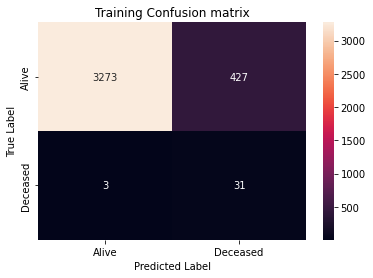

Training Accuracy = 0.884841992501339
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       925
           1       0.16      0.90      0.27        20

    accuracy                           0.90       945
   macro avg       0.58      0.90      0.61       945
weighted avg       0.98      0.90      0.93       945

[[832  93]
 [  2  18]]


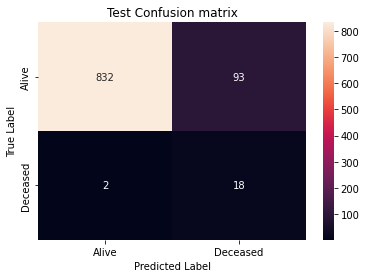

Testing Accuracy = 0.8994708994708994


In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

lr = LogisticRegression(penalty= 'l2', C = 0.2, solver = 'liblinear', class_weight='balanced', random_state=42)
lr.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

[0.91566265 0.93574297 0.92771084 0.91834003 0.94235925]
0.9279631483933948
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      3700
           1       0.05      0.76      0.09        34

    accuracy                           0.86      3734
   macro avg       0.52      0.81      0.51      3734
weighted avg       0.99      0.86      0.92      3734

[[3197  503]
 [   8   26]]


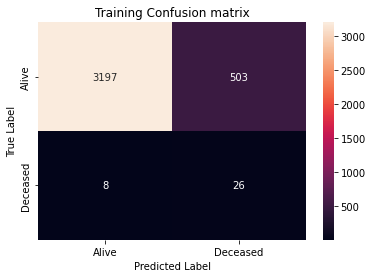

Training Accuracy = 0.8631494376004285
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       925
           1       0.14      0.90      0.24        20

    accuracy                           0.88       945
   macro avg       0.57      0.89      0.59       945
weighted avg       0.98      0.88      0.92       945

[[815 110]
 [  2  18]]


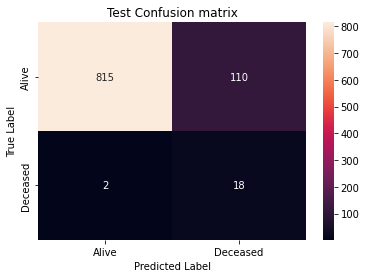

Testing Accuracy = 0.8814814814814815


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

lr = LogisticRegression(penalty= 'l2', C = 0.2, solver = 'liblinear', class_weight='balanced', random_state=42)
lr.fit(scaled_X_train,Y_train)
# cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

In [ ]:
# predictions = predictions.tolist()
# labels = Y_test.to_list()
# labelsIndex = Y_test.index.values.tolist()

# # Indexes where True Label Alive and Predicted Label is Deceased
# # They were discharged 'Alive' but our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==0 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/LR_TAPD.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Alive
# # They were discharged 'Deceased' but our model has predicted them 'Alive'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==0):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/LR_TDPA.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Deceased
# # They were discharged 'Deceased' and our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/LR_TDPD.xlsx', index=False)

## Loop for finding Hyper Parameters of AdaBoost

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score
parameters = []

In [ ]:
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=0
for n_estimators in [50, 100, 200]:
  for base_estimator in [DecisionTreeClassifier(), ExtraTreeClassifier(), RandomForestClassifier(), LogisticRegression(), svm.SVC(probability=True , kernel='linear')]:

    rfc = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
    rfc.fit(scaled_X_train,Y_train)
    # cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
    # cross_validation_scores.append(cross_validation.mean())
    i+=1
    print(i)
    predictions = rfc.predict(scaled_X_train)

    train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
    test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

    test_score.append(rfc.score(scaled_X_test, Y_test))

    dictonary = {'n_estimators': n_estimators, 'base_estimator': base_estimator} 
    parameters.append(dictonary)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage}).sort_values(['Test Deceased Accuracy'],ascending=False)
# deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,"{'n_estimators': 50, 'base_estimator': DecisionTreeClassifier()}",100.000000,100.000000,99.459459,35.0
5,"{'n_estimators': 100, 'base_estimator': DecisionTreeClassifier()}",100.000000,100.000000,99.459459,35.0
10,"{'n_estimators': 200, 'base_estimator': DecisionTreeClassifier()}",100.000000,100.000000,99.459459,35.0
3,"{'n_estimators': 50, 'base_estimator': LogisticRegression()}",99.675676,20.588235,99.891892,30.0
8,"{'n_estimators': 100, 'base_estimator': LogisticRegression()}",99.648649,20.588235,99.891892,30.0
13,"{'n_estimators': 200, 'base_estimator': LogisticRegression()}",99.648649,20.588235,99.891892,30.0
1,"{'n_estimators': 50, 'base_estimator': ExtraTreeClassifier()}",100.000000,100.000000,99.459459,20.0
6,"{'n_estimators': 100, 'base_estimator': ExtraTreeClassifier()}",100.000000,100.000000,99.459459,20.0
11,"{'n_estimators': 200, 'base_estimator': ExtraTreeClassifier()}",100.000000,100.000000,99.459459,20.0
2,"{'n_estimators': 50, 'base_estimator': RandomForestClassifier()}",100.000000,100.000000,100.000000,10.0


## Loop for finding accuracy as features are increased for AdaBoost

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
for i in range(1, 32):

  impColumn = featureImportanceArr[:i]

  X_trainSliced = X_train[impColumn]
  X_testSliced = X_test[impColumn]

  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_trainSliced)
  scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

  rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)
  rfc.fit(scaled_X_train,Y_train)
  cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
  cross_validation_scores.append(cross_validation.mean())
  i+=1
  print(i, end=', ')
  predictions = rfc.predict(scaled_X_train)

  train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
  test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

  test_score.append(rfc.score(scaled_X_test, Y_test))

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 

In [ ]:
print(cross_validation_scores)
print(train_confus_matrix)
print(test_confus_matrix)
print(test_score)

[0.9151070771019736, 0.8982360182463545, 0.8931490035207856, 0.8891329392637572, 0.8851190283923899, 0.893684837652666, 0.8990417433810307, 0.8931511569064462, 0.8995750652296406, 0.8891336570589777, 0.9006463745957916, 0.9054681639874961, 0.905201144165581, 0.9062724535317319, 0.9156454235171247, 0.9086871166524901, 0.9110928073329958, 0.9081469757492885, 0.914307453226669, 0.9062760425078329, 0.9191249358470521, 0.9188561215370867, 0.9110942429234363, 0.9156482946980056, 0.923944212955486, 0.9006513991623329, 0.9148386216896182, 0.918323158586087, 0.9220729208164202, 0.9220722030212001, 0.9303713513571713]
[array([[3414,  286],
       [  18,   16]]), array([[3324,  376],
       [  13,   21]]), array([[3331,  369],
       [  11,   23]]), array([[3369,  331],
       [  12,   22]]), array([[3304,  396],
       [  10,   24]]), array([[3315,  385],
       [   9,   25]]), array([[3325,  375],
       [   9,   25]]), array([[3290,  410],
       [   9,   25]]), array([[3316,  384],
       [  

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
deceasedPercentage = pd.DataFrame({"Top i Features choosen":np.arange(1,32), "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage})
deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
deceasedPercentage

,Top i Features choosen,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,1,92.270270,47.058824,93.513514,40.0
1,2,89.837838,61.764706,91.135135,65.0
2,3,90.027027,67.647059,91.783784,80.0
3,4,91.054054,64.705882,92.756757,70.0
4,5,89.297297,70.588235,91.351351,75.0
5,6,89.594595,73.529412,92.756757,95.0
6,7,89.864865,73.529412,93.513514,95.0
7,8,88.918919,73.529412,92.648649,95.0
8,9,89.621622,73.529412,93.513514,95.0
9,10,89.567568,70.588235,93.081081,100.0


In [ ]:
# So we can take from 7 to 18 features

## AdaBoost
 

[0.98795181 0.99062918 0.9892905  0.99062918 0.9919571 ]
0.9900915547803366
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      0.65      0.79        34

    accuracy                           1.00      3734
   macro avg       1.00      0.82      0.89      3734
weighted avg       1.00      1.00      1.00      3734

[[3700    0]
 [  12   22]]


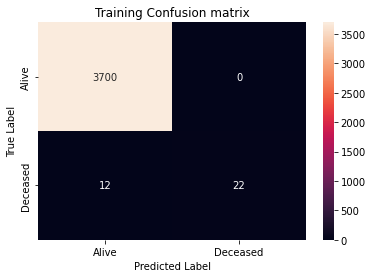

Training Accuracy = 0.9967862881628281
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       925
           1       0.25      0.10      0.14        20

    accuracy                           0.97       945
   macro avg       0.62      0.55      0.56       945
weighted avg       0.97      0.97      0.97       945

[[919   6]
 [ 18   2]]


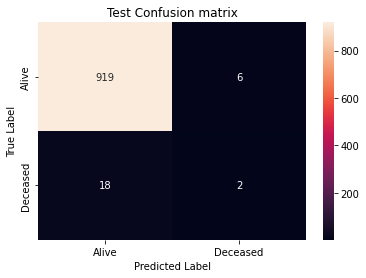

Testing Accuracy = 0.9746031746031746


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

lr = AdaBoostClassifier(n_estimators=100, random_state=42)
lr.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

[0.98795181 0.99062918 0.9892905  0.99062918 0.9919571 ]
0.9900915547803366
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      0.71      0.83        34

    accuracy                           1.00      3734
   macro avg       1.00      0.85      0.91      3734
weighted avg       1.00      1.00      1.00      3734

[[3700    0]
 [  10   24]]


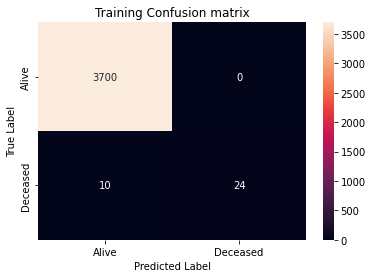

Training Accuracy = 0.9973219068023568
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       925
           1       0.40      0.10      0.16        20

    accuracy                           0.98       945
   macro avg       0.69      0.55      0.57       945
weighted avg       0.97      0.98      0.97       945

[[922   3]
 [ 18   2]]


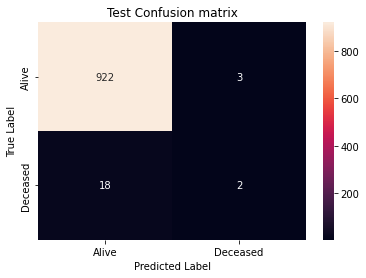

Testing Accuracy = 0.9777777777777777


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

lr = AdaBoostClassifier(n_estimators=100, random_state=42)
lr.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

## Loop for finding Hyper Parameters of Gradient Boost

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score
parameters = []

In [ ]:

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=0
for boosting_type in ['gbdt', 'dart', 'goss']:  
  for n_estimators in [50, 100]:
    for min_child_samples in [1, 2, 3, 4, 5]:
      for max_depth in [1]:

        rfc = LGBMClassifier(class_weight='balanced', max_depth=max_depth, min_child_samples =min_child_samples,
                              n_estimators=n_estimators, boosting_type=boosting_type, random_state=42)
        RandomForestClassifier()
        rfc.fit(scaled_X_train,Y_train)
        cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
        cross_validation_scores.append(cross_validation.mean())
        i+=1
        print(i)
        predictions = rfc.predict(scaled_X_train)

        train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
        test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

        test_score.append(rfc.score(scaled_X_test, Y_test))
        dictonary = {'boosting_type': boosting_type, 'n_estimators': n_estimators, 'min_child_samples': min_child_samples, 
                          'max_depth': max_depth} 
        parameters.append(dictonary)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [ ]:
# print(cross_validation_scores)
# print(train_confus_matrix)
# print(test_confus_matrix)
# print(test_score)

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage}).sort_values(['Test Deceased Accuracy', 'Test Alive Accuracy'],ascending=False)
# deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
10,"{'boosting_type': 'dart', 'n_estimators': 50, 'min_child_samples': 1, 'max_depth': 1}",81.405405,85.294118,85.729730,100.0
11,"{'boosting_type': 'dart', 'n_estimators': 50, 'min_child_samples': 2, 'max_depth': 1}",81.405405,85.294118,85.729730,100.0
12,"{'boosting_type': 'dart', 'n_estimators': 50, 'min_child_samples': 3, 'max_depth': 1}",81.405405,85.294118,85.729730,100.0
13,"{'boosting_type': 'dart', 'n_estimators': 50, 'min_child_samples': 4, 'max_depth': 1}",81.405405,85.294118,85.729730,100.0
14,"{'boosting_type': 'dart', 'n_estimators': 50, 'min_child_samples': 5, 'max_depth': 1}",81.405405,85.294118,85.729730,100.0
0,"{'boosting_type': 'gbdt', 'n_estimators': 50, 'min_child_samples': 1, 'max_depth': 1}",86.864865,85.294118,90.162162,90.0
1,"{'boosting_type': 'gbdt', 'n_estimators': 50, 'min_child_samples': 2, 'max_depth': 1}",86.864865,85.294118,90.162162,90.0
2,"{'boosting_type': 'gbdt', 'n_estimators': 50, 'min_child_samples': 3, 'max_depth': 1}",86.864865,85.294118,90.162162,90.0
3,"{'boosting_type': 'gbdt', 'n_estimators': 50, 'min_child_samples': 4, 'max_depth': 1}",86.864865,85.294118,90.162162,90.0
4,"{'boosting_type': 'gbdt', 'n_estimators': 50, 'min_child_samples': 5, 'max_depth': 1}",86.864865,85.294118,90.162162,90.0


## Loop for finding accuracy as features are increased for Gradient Boost

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
for i in range(1, 32):

  impColumn = featureImportanceArr[:i]

  X_trainSliced = X_train[impColumn]
  X_testSliced = X_test[impColumn]

  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_trainSliced)
  scaled_X_test = sc.transform(X_testSliced) # For scaling Test data
  rfc = LGBMClassifier(class_weight='balanced', max_depth=1, min_child_samples =3,
                              n_estimators=100, boosting_type='gbdt', random_state=42)

  rfc.fit(scaled_X_train,Y_train)
  cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
  cross_validation_scores.append(cross_validation.mean())
  i+=0
  print(i, end=', ')
  predictions = rfc.predict(scaled_X_train)

  train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
  test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

  test_score.append(rfc.score(scaled_X_test, Y_test))

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 

In [ ]:
print(cross_validation_scores)
print(train_confus_matrix)
print(test_confus_matrix)
print(test_score)

[0.8414483671953228, 0.9022495702201118, 0.8888601770800808, 0.8968984068535087, 0.8968984068535087, 0.8784209222950784, 0.8717271229690882, 0.8695855809296166, 0.8757424694308961, 0.8813642415955153, 0.8872591348414209, 0.8958267385897477, 0.8977009019096942, 0.8977009019096942, 0.8979689984244394, 0.8974324464973389, 0.8974324464973389, 0.8971647088802037, 0.8971647088802037, 0.897700184114474, 0.8979679217316093, 0.9003772013882161, 0.9003772013882161, 0.9003772013882161, 0.9003772013882161, 0.9003772013882161, 0.8998417261539456, 0.9006449390053513, 0.9006449390053513, 0.8998417261539456, 0.8998417261539456]
[array([[3376,  324],
       [  12,   22]]), array([[3305,  395],
       [  10,   24]]), array([[3233,  467],
       [   8,   26]]), array([[3308,  392],
       [   9,   25]]), array([[3308,  392],
       [   9,   25]]), array([[3182,  518],
       [   6,   28]]), array([[3181,  519],
       [   5,   29]]), array([[3181,  519],
       [   5,   29]]), array([[3217,  483],
      

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
deceasedPercentage = pd.DataFrame({"Top i Features choosen":np.arange(1,32), "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage})
deceasedPercentage.to_csv("deceasedPercentage.csv", index=False)

In [ ]:
deceasedPercentage

,Top i Features choosen,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy
0,1,91.243243,64.705882,92.540541,90.0
1,2,89.324324,70.588235,90.486486,90.0
2,3,87.378378,76.470588,89.189189,90.0
3,4,89.405405,73.529412,91.891892,85.0
4,5,89.405405,73.529412,91.891892,85.0
5,6,86.000000,82.352941,90.054054,90.0
6,7,85.972973,85.294118,89.729730,90.0
7,8,85.972973,85.294118,89.729730,90.0
8,9,86.945946,82.352941,90.162162,90.0
9,10,87.594595,88.235294,90.594595,95.0


In [ ]:
# So we can take from 7 to 18 features

## Gradient Boost
 

[0.96251673 0.97858099 0.95582329 0.95582329 0.97050938]
0.9646507387907304
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3700
           1       0.25      1.00      0.40        34

    accuracy                           0.97      3734
   macro avg       0.63      0.99      0.70      3734
weighted avg       0.99      0.97      0.98      3734

[[3600  100]
 [   0   34]]


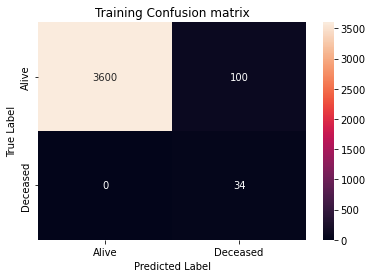

Training Accuracy = 0.9732190680235672
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       925
           1       0.34      0.65      0.45        20

    accuracy                           0.97       945
   macro avg       0.67      0.81      0.72       945
weighted avg       0.98      0.97      0.97       945

[[900  25]
 [  7  13]]


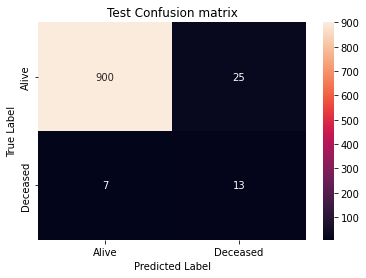

Testing Accuracy = 0.9661375661375662


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

from lightgbm import LGBMClassifier

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

lr = LGBMClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, class_weight = 'balanced',random_state=42)
lr.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

[0.86746988 0.9103079  0.90093708 0.91164659 0.90884718]
0.8998417261539456
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3700
           1       0.07      0.88      0.13        34

    accuracy                           0.89      3734
   macro avg       0.53      0.89      0.54      3734
weighted avg       0.99      0.89      0.94      3734

[[3302  398]
 [   4   30]]


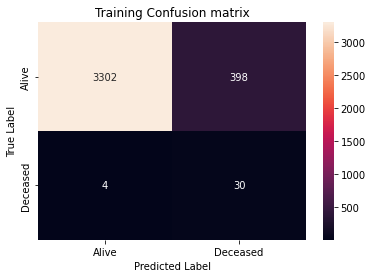

Training Accuracy = 0.8923406534547402
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       925
           1       0.17      0.85      0.29        20

    accuracy                           0.91       945
   macro avg       0.58      0.88      0.62       945
weighted avg       0.98      0.91      0.94       945

[[843  82]
 [  3  17]]


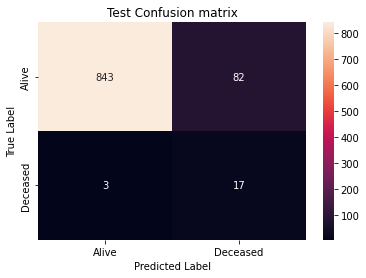

Testing Accuracy = 0.91005291005291


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

lr = LGBMClassifier(class_weight='balanced', max_depth=1, min_child_samples =3,
                              n_estimators=100, boosting_type='gbdt', random_state=42)
lr.fit(scaled_X_train,Y_train)
cross_validation = cross_val_score(lr,X_train,Y_train,scoring="accuracy",cv=5)
print(cross_validation)
print(cross_validation.mean())

predictions = lr.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(lr.score(scaled_X_train, Y_train)))

predictions = lr.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(lr.score(scaled_X_test, Y_test)))

## Ensembling of all Models in order to get final Results


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
lr = LogisticRegression(penalty= 'l2', C = 0.2, solver = 'liblinear', class_weight='balanced', random_state=42)

rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)

svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale', random_state=42)

lgbm = LGBMClassifier(class_weight='balanced', max_depth=1, min_child_samples =3,
                              n_estimators=100, boosting_type='gbdt', random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rfc), ('svc', svc), ('lgbm', lgbm)], voting='hard')

impFeat = 15

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3700
           1       0.12      0.85      0.21        34

    accuracy                           0.94      3734
   macro avg       0.56      0.90      0.59      3734
weighted avg       0.99      0.94      0.96      3734

[[3486  214]
 [   5   29]]


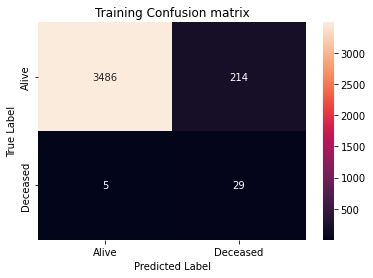

Training Accuracy = 0.9413497589716122
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       925
           1       0.28      0.90      0.43        20

    accuracy                           0.95       945
   macro avg       0.64      0.93      0.70       945
weighted avg       0.98      0.95      0.96       945

[[879  46]
 [  2  18]]


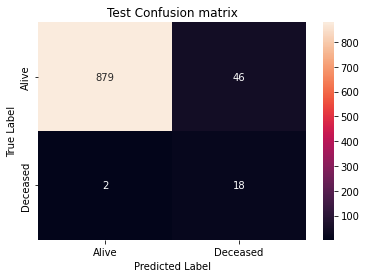

Testing Accuracy = 0.9492063492063492


In [ ]:
impFeat = 15
impColumn = featureImportanceArr#[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

voting_clf.fit(scaled_X_train,Y_train)
# cross_validation = cross_val_score(voting_clf,X_train,Y_train,scoring="accuracy",cv=5)
# print(cross_validation)
# print(cross_validation.mean())

predictions = voting_clf.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(voting_clf.score(scaled_X_train, Y_train)))

predictions = voting_clf.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(voting_clf.score(scaled_X_test, Y_test)))

In [ ]:
import joblib

joblib.dump(voting_clf, '/content/drive/MyDrive/2 AI in health care/Models/Models_model.pkl')

# model_joblib = joblib.load('/content/drive/MyDrive/2 AI in health care/Models/Models_model.pkl')

['/content/drive/MyDrive/2 AI in health care/Models/Models_model.pkl']

## Best Model Parameters

In [ ]:
'''
SVM 
svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale')

Random Forest
# For ALl features
rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)

Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)

'''

## Getting Confusion Matrix Data

In [ ]:
predictions = predictions.tolist()
labels = Y_test.to_list()
labelsIndex = Y_test.index.values.tolist()

In [ ]:
dictionary = {'Sex': {0: 'M', 1: 'F'},
 'Hypertension': {0: 'Yes', 1: 'No', -1: -1},
 'Diabetes': {0: 'No', 1: 'Yes', -1: -1},
 'Dyslipidemia': {0: 'No', 1: 'Yes', -1: -1},
 'TobaccoUse': {0: 'No', 1: 'Yes', 2: 'Former', -1: -1},
 'PriorPCI': {0: 'Yes', 1: 'No', -1: -1},
 'PriorCABG': {0: 'No', 1: 'Yes', -1: -1},
 'HxHF': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Aspirin': {0: 'No', 1: 'Yes'},
 'PreProcMedAdmin-Beta Blocker': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Statin': {0: 'Yes', -1: -1, 1: 'No', 2: 'Contraindicated'},
 'AccessSite': {0: 'Femoral', 1: 'Radial', 2: 'Brachial', 3: 'Other'},
 'PreProcTnTND': {0: 'Yes', 1: 'No'},
 'Dominance': {0: 'Right', 1: 'Co-dominant', 2: 'Left', -1: -1},
 'PCIStatus': {0: 'Elective', 1: 'Emergency', 2: 'Urgent', -1: -1},
 'PCIIndication': {0: 'PCI for high risk Non-STEMI or unstable angina',
  1: 'PCI for STEMI (Stable, >12 hrs from Sx onset)',
  2: 'PCI for STEMI (Stable after successful full-dose Thrombolysis)',
  3: 'PCI for STEMI (Unstable, >12 hrs from Sx onset)',
  4: 'Immediate PCI for STEMI',
  5: 'Staged PCI',
  6: 'Other',
  7: 'Rescue PCI for STEMI (after failed full-dose lytics)',
  8: 'NSTE - ACS',
  9: 'STEMI - Unstable (> 12 hrs from Sx)',
  10: 'Stable angina',
  11: 'STEMI - Stable (> 12 hrs from Sx)',
  12: 'STEMI (after successful lytics)',
  13: 'New Onset Angina <= 2 months',
  14: 'STEMI - Immediate PCI for Acute STEMI',
  15: 'Other PCI Indication',
  16: 'STEMI - Stable (<= 12 hrs from Sx)',
  17: 'CAD (without ischemic Sx)',
  18: 'STEMI - Rescue (After unsuccessful lytics)'}}

ObjCol = ['Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse', 'PriorPCI', 'PriorCABG', 'HxHF', 
          'PreProcMedAdmin-Aspirin', 'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite', 
          'PreProcTnTND', 'Dominance', 'PCIStatus', 'PCIIndication']

In [ ]:
print(labels)
print(labelsIndex)
print(predictions) # Alive = 0, Deceased = 1

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Indexes where True Label Alive and Predicted Label is Deceased
# They were discharged 'Alive' but our model has predicted them 'Deceased'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==0 and predictions[i]==1):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TAPD.xlsx', index=False)

In [ ]:
# Indexes where True Label Deceased and Predicted Label is Alive
# They were discharged 'Deceased' but our model has predicted them 'Alive'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==1 and predictions[i]==0):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPA.xlsx', index=False)

In [ ]:
# Indexes where True Label Deceased and Predicted Label is Deceased
# They were discharged 'Deceased' and our model has predicted them 'Deceased'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==1 and predictions[i]==1):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPD.xlsx', index=False)

In [ ]:
# print(len(requiredLabels))
# print(requiredLabels)

19
[2116, 3809, 922, 1960, 3665, 1064, 3748, 3350, 4284, 2189, 120, 2467, 3830, 1991, 4619, 3943, 1402, 232, 3579]


In [ ]:
requiredDataframe = X_test.loc[requiredLabels]

In [ ]:
for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)

In [ ]:
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TAPD.xlsx', index=False)

In [ ]:
requiredDataframe

,Age,Sex,Hypertension,Diabetes,Dyslipidemia,TobaccoUse,LMCA,RCA,LAD,CIRC,Vessel,Stent,PriorPCI,PriorCABG,HxHF,PreProcLVEF,PreProcMedAdmin-Aspirin,PreProcMedAdmin-Beta Blocker,PreProcMedAdmin-Statin,AccessSite,FluoroTime,PreProcCreat,HGB,LipidsTC,LipidsHDL,PreProcTnTND,PostProcCreat,PostProcHgb,Dominance,PCIStatus,PCIIndication
3899,55,M,Yes,No,No,No,0,1,1,0,2,2,No,No,No,40,Yes,Yes,Yes,Radial,11.0,3.71,8.6,NA,NA,Yes,3.61,8.2,Right,Elective,NSTE - ACS
2933,83,M,Yes,No,No,No,0,0,0,1,1,1,No,No,No,45,Yes,Yes,Yes,Radial,27.0,1.26,9.9,151,37,Yes,1.04,9.7,Right,Elective,STEMI - Unstable (> 12 hrs from Sx)
3595,54,M,Yes,Yes,No,No,0,1,1,0,2,2,No,No,No,30,Yes,Yes,Yes,Radial,21.0,0.86,12.6,115,25,Yes,0.82,12.8,Right,Elective,CAD (without ischemic Sx)
3535,68,M,Yes,Yes,No,Former,0,1,0,0,1,1,No,No,No,35,Yes,Yes,Yes,Radial,18.0,1.51,10.3,216,33,Yes,2.16,10.9,Right,Elective,STEMI - Unstable (> 12 hrs from Sx)
4609,69,M,Yes,No,No,No,0,0,0,1,1,1,No,No,No,30,No,No,No,Radial,11.0,1.95,14.3,164,25,Yes,2.26,11.3,Right,Urgent,STEMI - Immediate PCI for Acute STEMI
4628,81,F,Yes,Yes,No,No,0,0,1,1,2,1,Yes,No,No,55,No,Yes,Yes,Femoral,35.0,1.46,13.1,110,31,Yes,1.78,8.1,Right,Elective,Other PCI Indication
3713,51,M,No,No,No,No,0,0,1,1,2,1,No,No,No,30,Yes,Yes,Yes,Radial,7.0,1.69,11.3,114,35,Yes,1.39,10.4,Right,Elective,NSTE - ACS
3472,76,M,No,No,No,No,0,1,0,1,2,1,No,No,No,35,Yes,No,Yes,Femoral,17.0,0.92,12.8,121,19,Yes,0.99,12.6,Right,Elective,CAD (without ischemic Sx)
4168,61,M,Yes,Yes,No,No,0,0,0,1,1,1,No,Yes,No,20,Yes,Yes,Yes,Femoral,38.0,1.26,13.7,87,24,Yes,1.28,13.0,Right,Elective,NSTE - ACS
145,65,F,No,No,No,No,0,0,1,1,2,1,No,No,No,30,No,No,Yes,Radial,24.0,1.60,13.0,NA,NA,Yes,1.50,10.9,Left,Elective,PCI for STEMI (Stable after successful full-dose Thrombolysis)


## Code

In [ ]:
train_predictions = voting_clf.predict(scaled_X_train)
test_predictions = voting_clf.predict(scaled_X_test)
len(train_predictions)

3734

In [ ]:
new_train = train
new_test = test
new_train['predictions'] = train_predictions
new_test['predictions'] = test_predictions

In [ ]:
# new_train = new_train[new_train['Discharge_Status']==1]
# new_test = new_test[new_test['Discharge_Status']==1]

corr_train_predictions = new_train[new_train['Discharge_Status']==new_train['predictions']]
corr_test_predictions = new_test[new_test['Discharge_Status']==new_test['predictions']]

print(corr_train_predictions.shape)
print(corr_test_predictions.shape)

(3369, 33)
(871, 33)


In [ ]:
col = 'Diabetes'
print(corr_train_predictions[corr_train_predictions[col]==1].shape)
print(train[train[col]==1].shape)

print(corr_test_predictions[corr_test_predictions[col]==1].shape)
print(test[test[col]==1].shape)


# col = 'Diabetes'
# print(corr_train_predictions[corr_train_predictions[col]==1].shape)
# print(train[(train[col]==1) & (train['Discharge_Status']==1)].shape)

# print(corr_test_predictions[corr_test_predictions[col]==1].shape)
# print(test[(test[col]==1) & (test['Discharge_Status']==1)].shape)

# (1424, 33)
# (1581, 33)
# (174, 33)
# (189, 33)

(1240, 33)
(1412, 33)
(326, 33)
(358, 33)


In [ ]:
new_test = new_test[new_test['Discharge_Status']==1]

In [ ]:
col = 'Age'

print(corr_train_predictions[corr_train_predictions[col]>50].shape)
print(train[train[col]>50].shape)

print(corr_test_predictions[corr_test_predictions[col]>50].shape)
print(test[test[col]>50].shape)

# print(corr_train_predictions[corr_train_predictions[col]<50].shape)
# print(train[(train[col]<50) & (train['Discharge_Status']==1)].shape)

# print(corr_test_predictions[corr_test_predictions[col]<50].shape)
# print(test[(test[col]<50) & (test['Discharge_Status']==1)].shape)

# (619, 33)
# (649, 33)
# (71, 33)
# (72, 33)

(2722, 33)
(3049, 33)
(693, 33)
(753, 33)


In [ ]:
corr_train_predictions

In [ ]:
mydata.columns

Index(['Age', 'Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse',
       'LMCA', 'RCA', 'LAD', 'CIRC', 'Vessel', 'Stent', 'PriorPCI',
       'PriorCABG', 'HxHF', 'PreProcLVEF', 'PreProcMedAdmin-Aspirin',
       'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite',
       'FluoroTime', 'PreProcCreat', 'HGB', 'LipidsTC', 'LipidsHDL',
       'PreProcTnTND', 'PostProcCreat', 'PostProcHgb', 'Dominance',
       'PCIStatus', 'PCIIndication', 'Discharge_Status'],
      dtype='object')

In [ ]:
col = 'Age'
# print(train[col].value_counts())
# print(test[col].value_counts())
# print(train[train.Discharge_Status==1][col].value_counts())
# print(test[test.Discharge_Status==1][col].value_counts())
# print(mydata[col].value_counts())

print(train[col].mean())
print(test[col].mean())
print(train[train.Discharge_Status==1][col].mean())
print(test[test.Discharge_Status==1][col].mean())
print(mydata[col].mean())

60.276914836636315
59.716402116402115
64.55882352941177
59.95
60.163710194486


In [ ]:
l=np.arange(0,10)
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
import sklearn

In [ ]:
pd.__version__


AttributeError: ignored

In [ ]:
'''
numpy>=1.17
scikit-learn>=0.22
pandas>=1.1.5
sklearn>=1.0.2
'''